# Predicting Housing Cost Based on Various Input Parameters
### Matthew Saporito
### Arizona State University
### DAT 301 Project 2


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import tensorflow as tf
import os

from bokeh.plotting import figure, output_notebook, show
output_notebook()
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy import stats
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime
from bayes_opt import BayesianOptimization


# Read the CSV file into a pandas DataFrame
file_name = 'housingdata.csv'
df = pd.read_csv(file_name)

# Print the head of the data frame
print(df.head())

Loading BokehJS ...

            date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  5/2/2014 0:00   313000.0         3       1.50         1340      7912   
1  5/2/2014 0:00  2384000.0         5       2.50         3650      9050   
2  5/2/2014 0:00   342000.0         3       2.00         1930     11947   
3  5/2/2014 0:00   420000.0         3       2.25         2000      8030   
4  5/2/2014 0:00   550000.0         4       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0

### Printing the head of the data in order to understand which variables are available for analysis. 

In [4]:
# Print information about the dataset to learn more about it
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

### It's important to clean the data before analysis to ensure quality, accuracy, and efficiency of the analysis process. 

In [5]:
# Cleaning the data
# Fill missing values with the mean value of the corresponding column
df.fillna(df.mean(numeric_only=True), inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

### Basic summary statistics of the data set can be seen below. This provides a cursory analysis of the housing data that will be examined in much greater detail later. 

In [6]:
# Perform basic statistical analysis on the DataFrame
summary = df.describe()

# Print the summary
print(summary)

              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       

### The distribution of variables is shown below. This is important because it helps to understand how the data is spread out or clustered around particular values. This understanding is important for making appropriate assumptions about the data and selecting appropriate statistical methods for analysis.

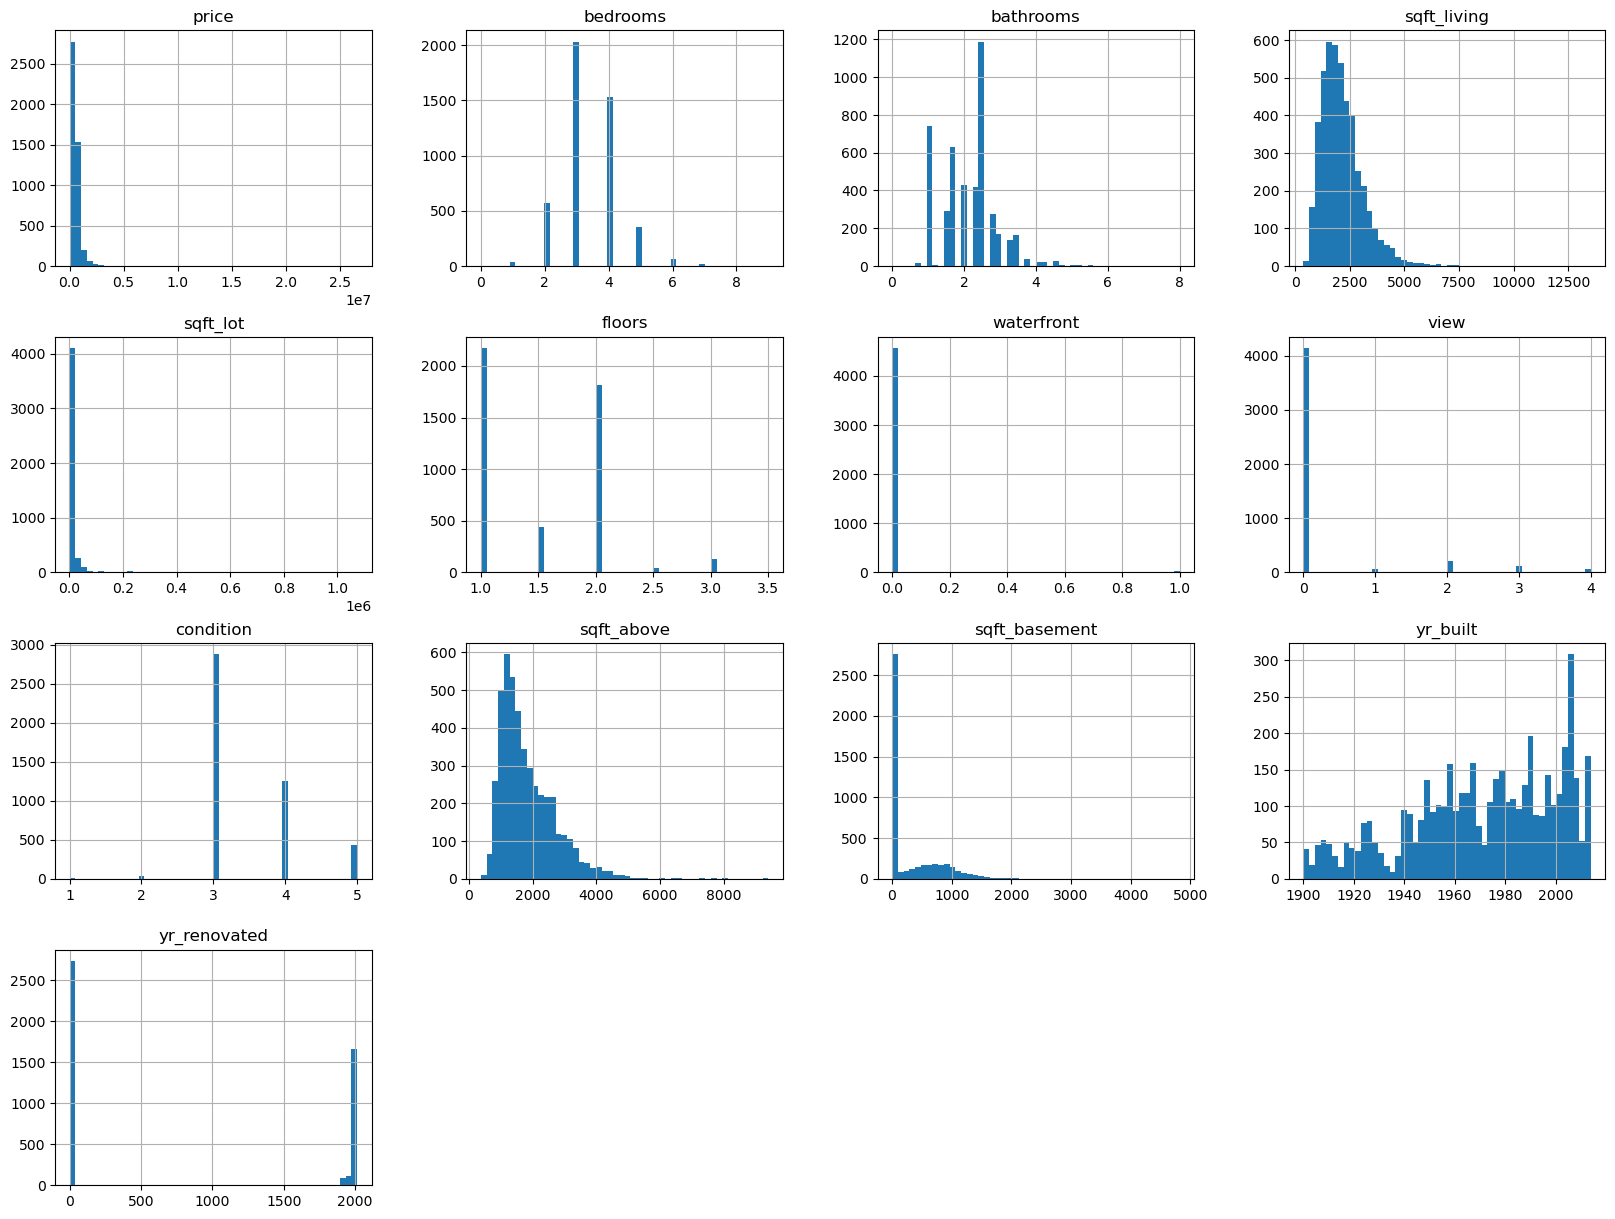

In [7]:
# Visualize the distribution of variables
df.hist(bins=50, figsize=(20,15))
plt.show()

### Kernel density estimation (KDE) plots show the distribution of a variable as a smooth curve. The curve is an estimate of the probability density function (PDF) of the variable, which represents the relative likelihood of observing different values of the variable.KDE plots are useful for visualizing the shape of the distribution of a variable, including the presence of multiple modes, skewness, and outliers. They can also be used to compare the distributions of two or more variables.

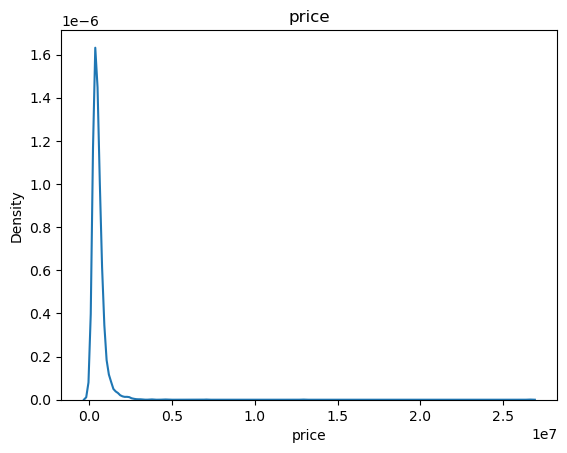

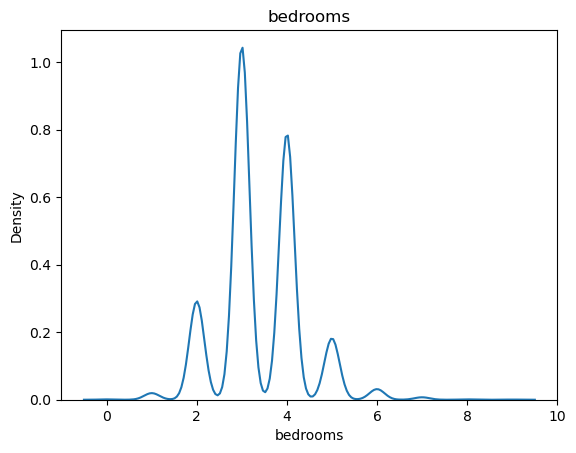

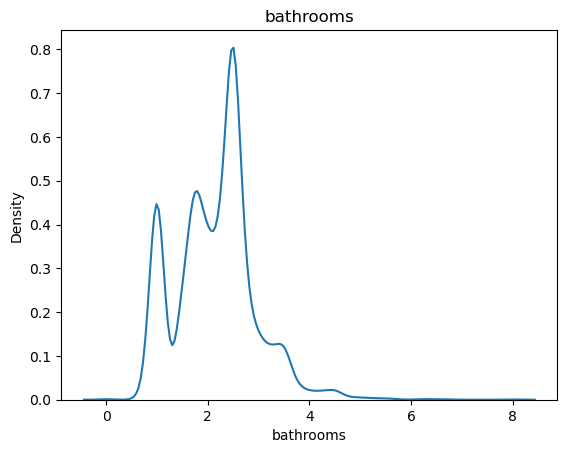

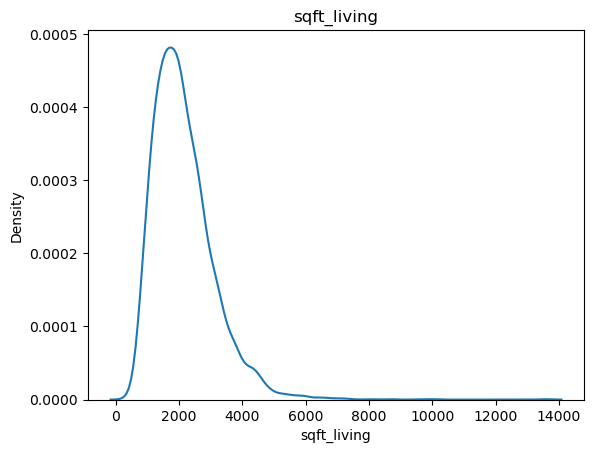

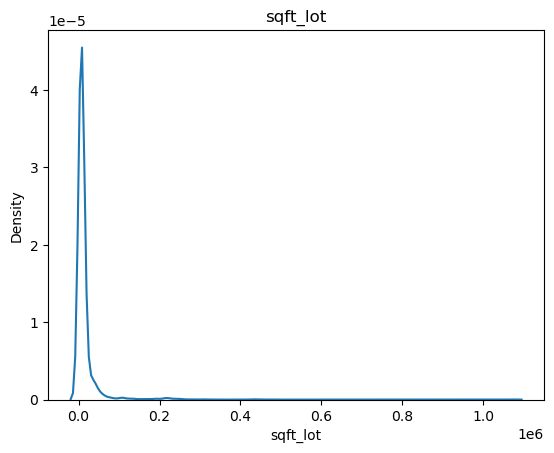

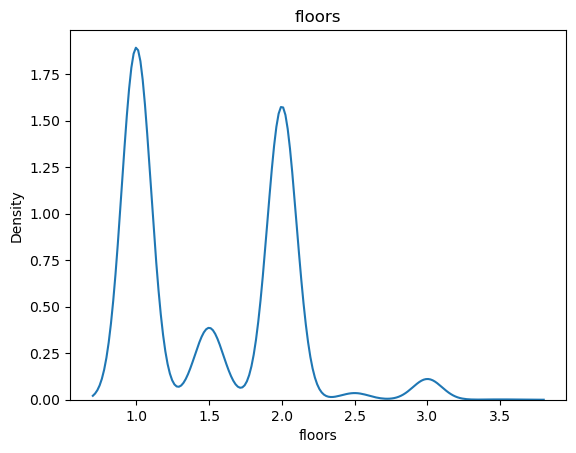

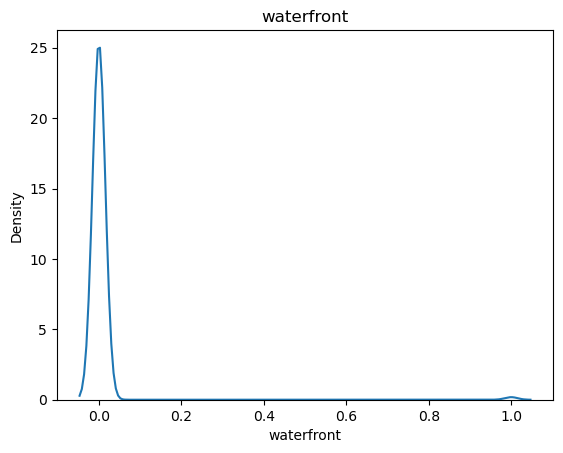

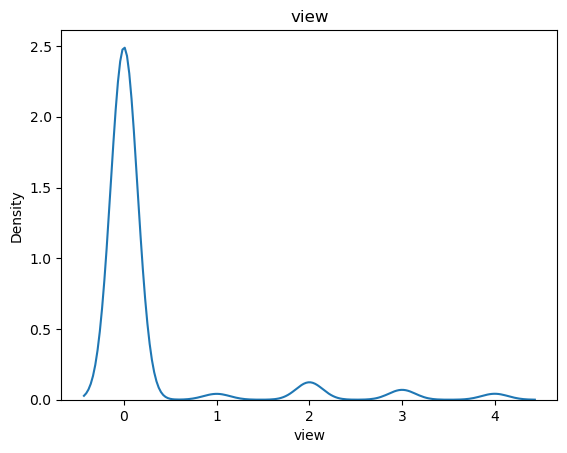

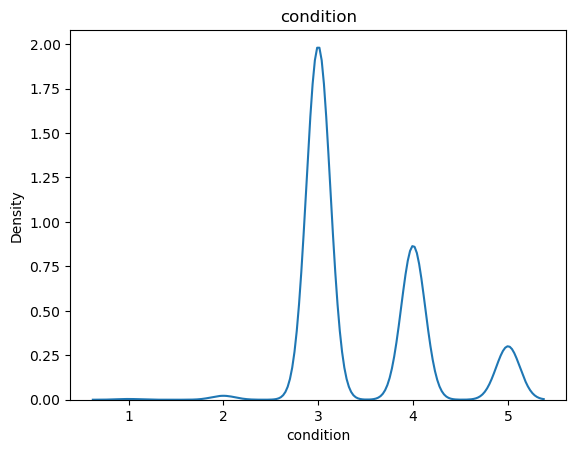

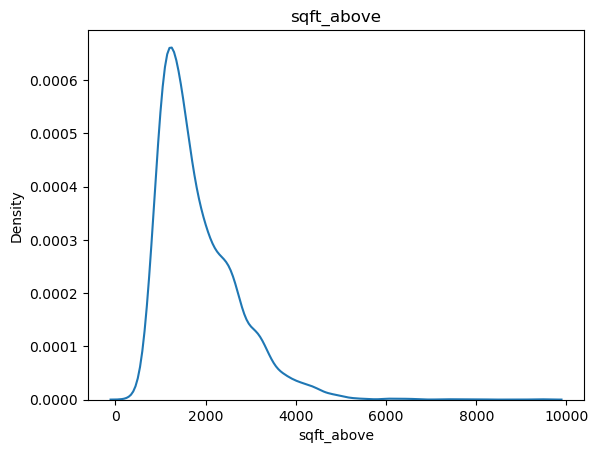

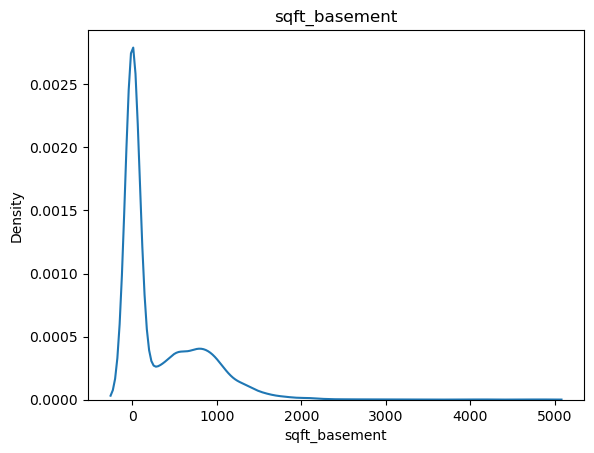

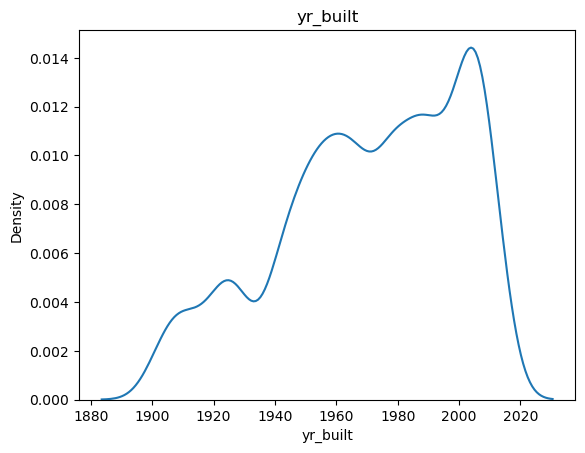

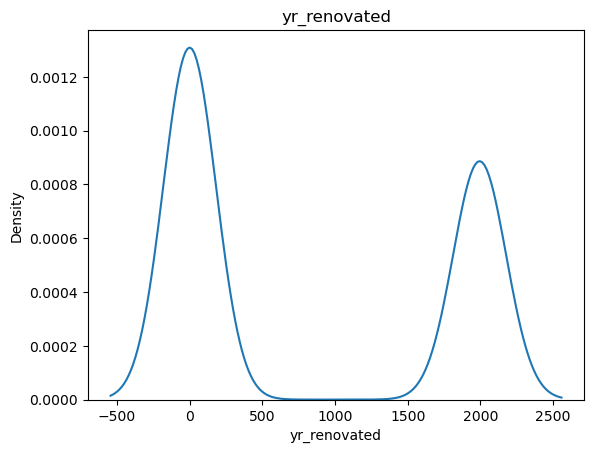

In [8]:
# Kernel density estimation (KDE) plots

# Filter out numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# These plots provide a smooth estimate of the probability density function of a variable.
for col in numeric_columns:
    sns.kdeplot(df[col])
    plt.title(col)
    plt.show()

### Pairplots, also known as scatterplot matrices or pairwise scatter plots, are useful for visualizing the relationships between multiple variables in a dataset. 
### They are a series of scatter plots that display the distribution and relationship between every pair of variables in a dataset, allowing you to explore patterns, trends, and correlations between different variables quickly and effectively.

### Pairplots can be helpful for:
### -Exploring data: Pairplots provide a comprehensive view of the relationships between variables, enabling you to quickly identify trends, patterns, and outliers in the data.
### -Identifying relationships and correlations: Pairplots can help identify both linear and non-linear relationships between variables, as well as potential correlations or dependencies. 
### -This information can be valuable for further data analysis, modeling, and feature selection.
### Checking assumptions: 
### -In some statistical models, assumptions about the relationship between variables, such as linearity and homoscedasticity, need to be met. 
### -Pairplots can help visually assess whether these assumptions hold true for the data.

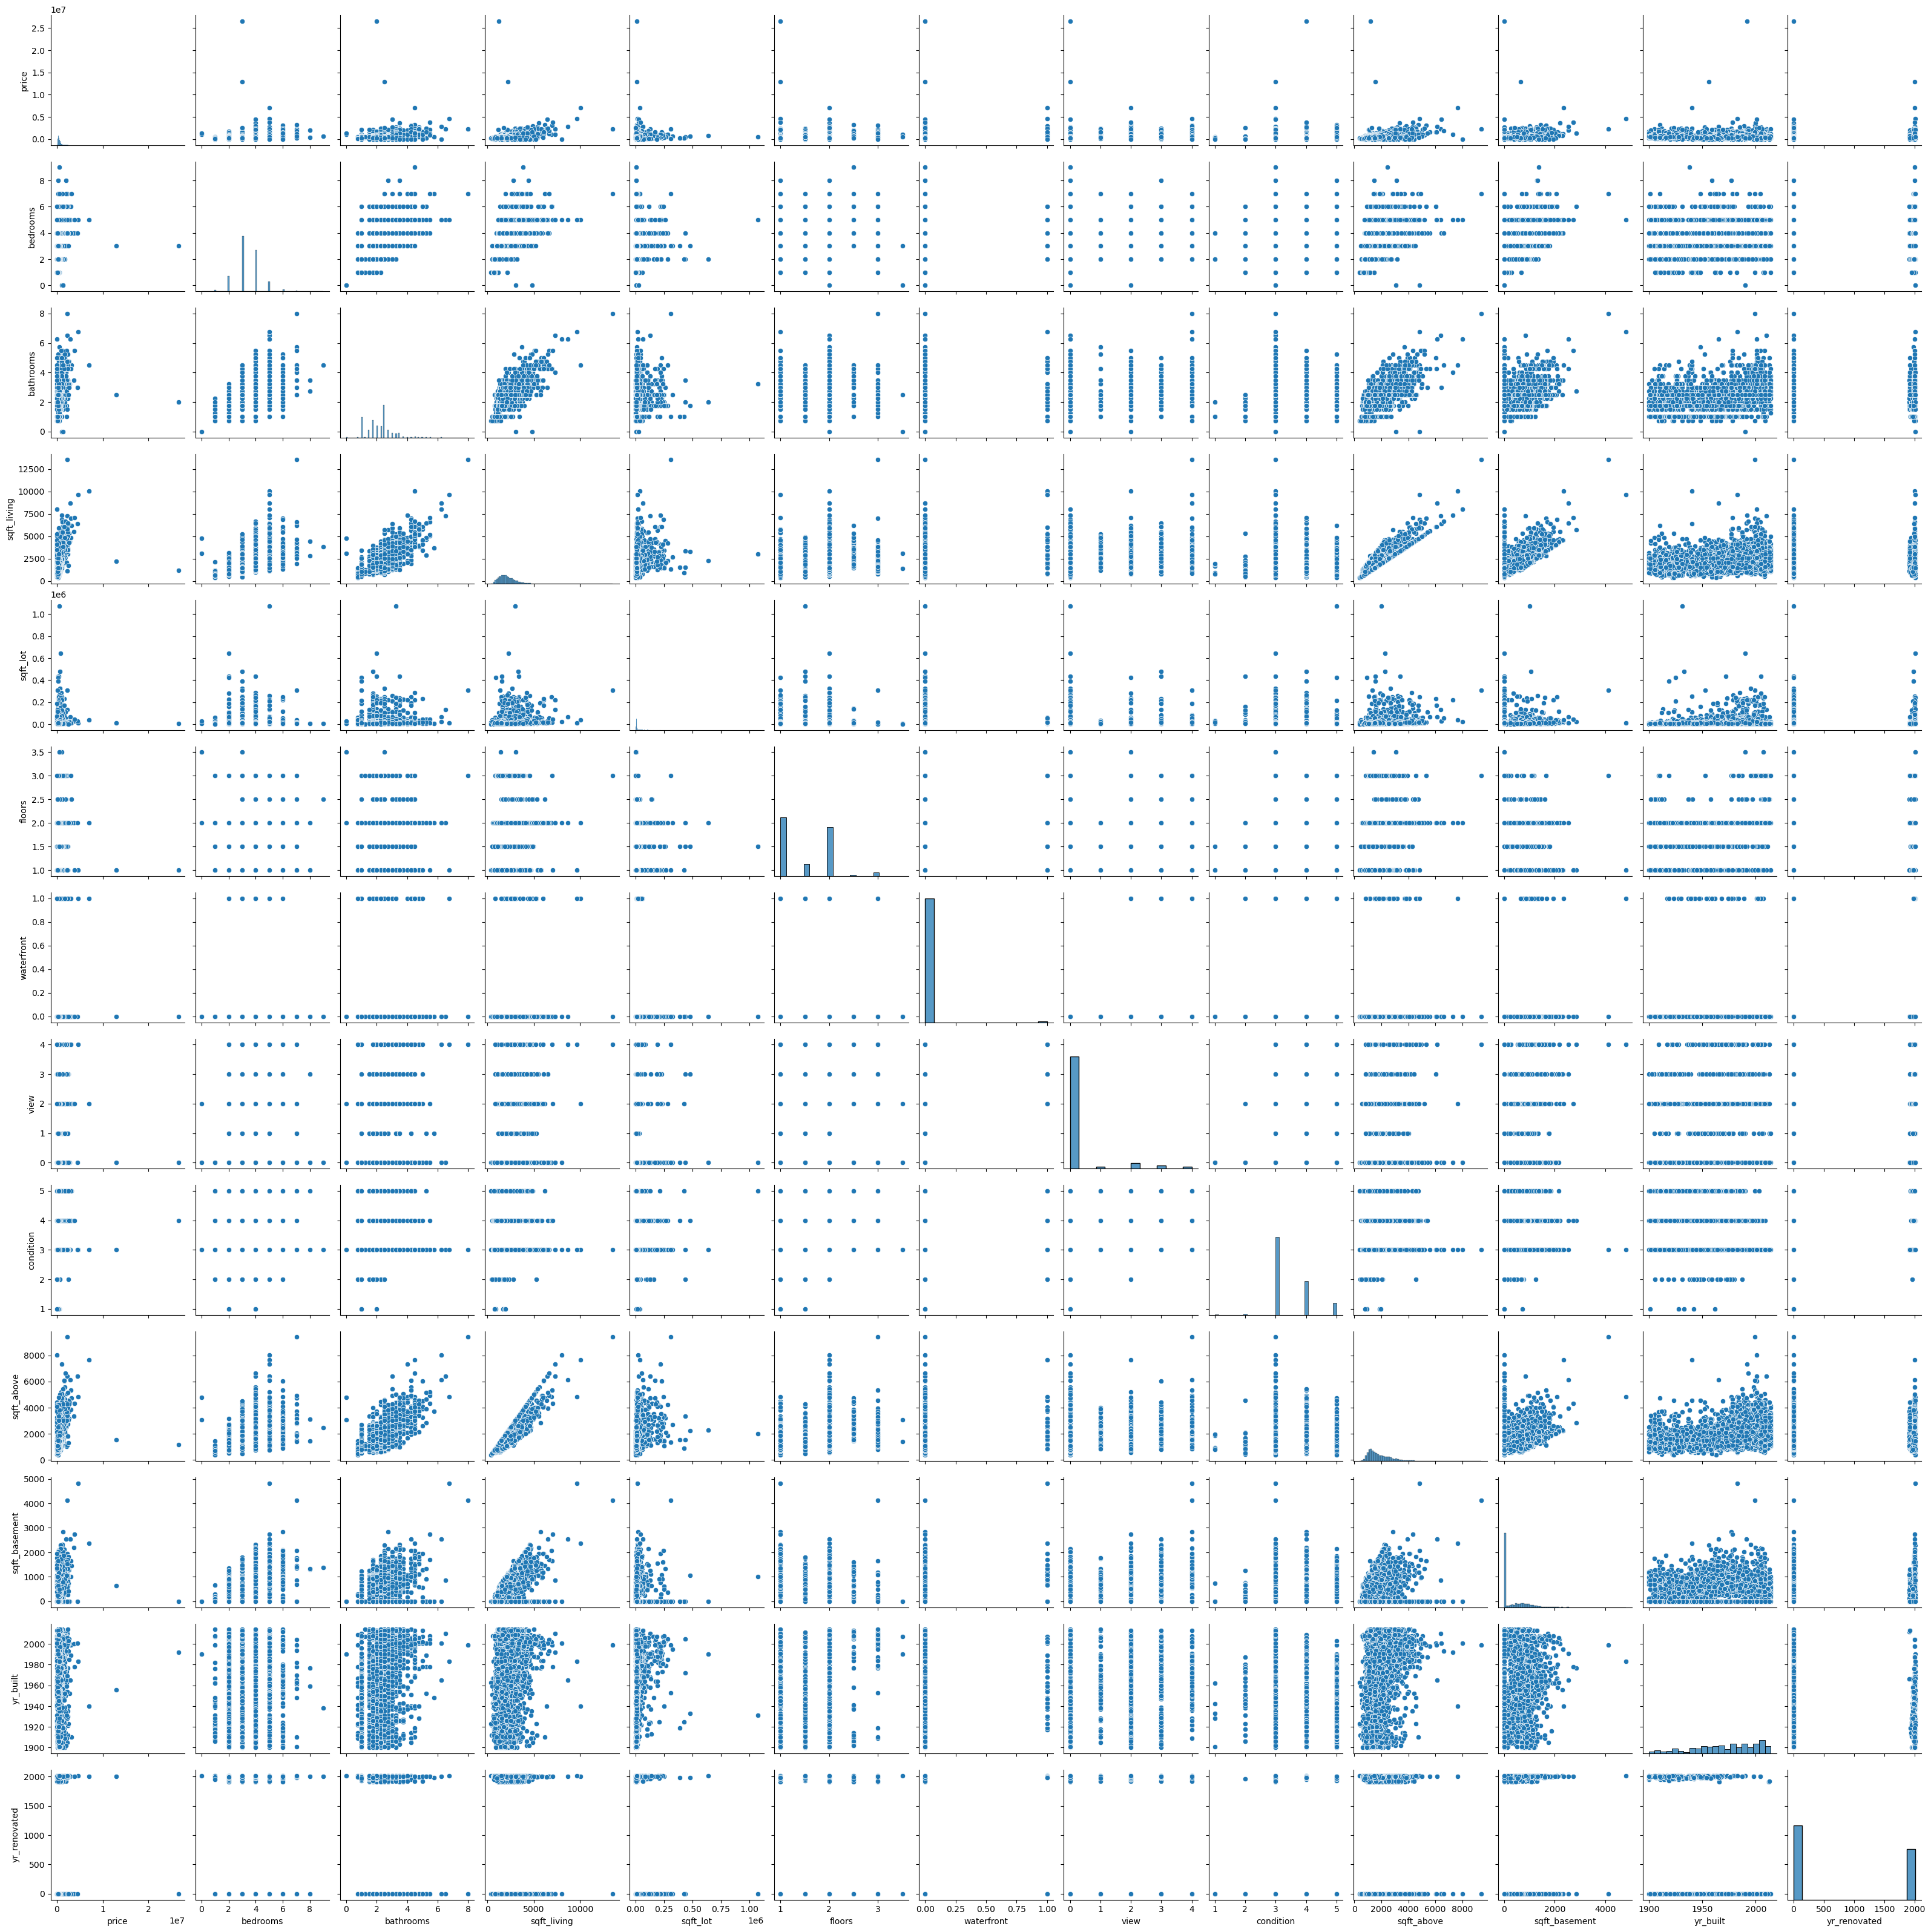

In [9]:
# Examine relationships between variables using pairplots
sns.pairplot(df)
plt.show()

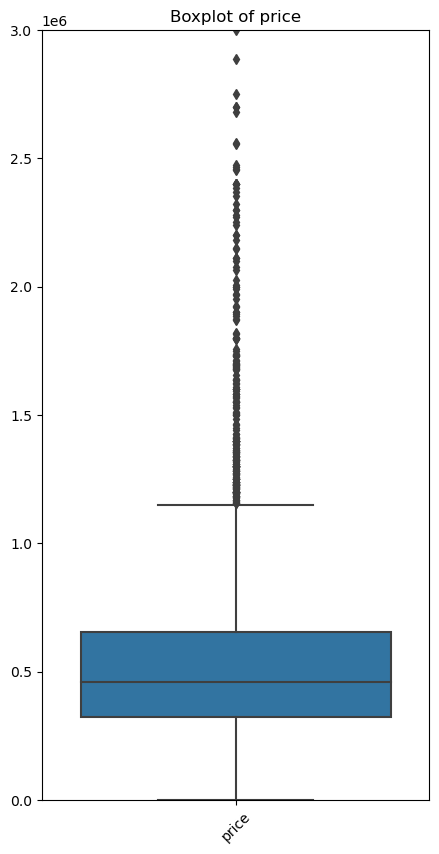

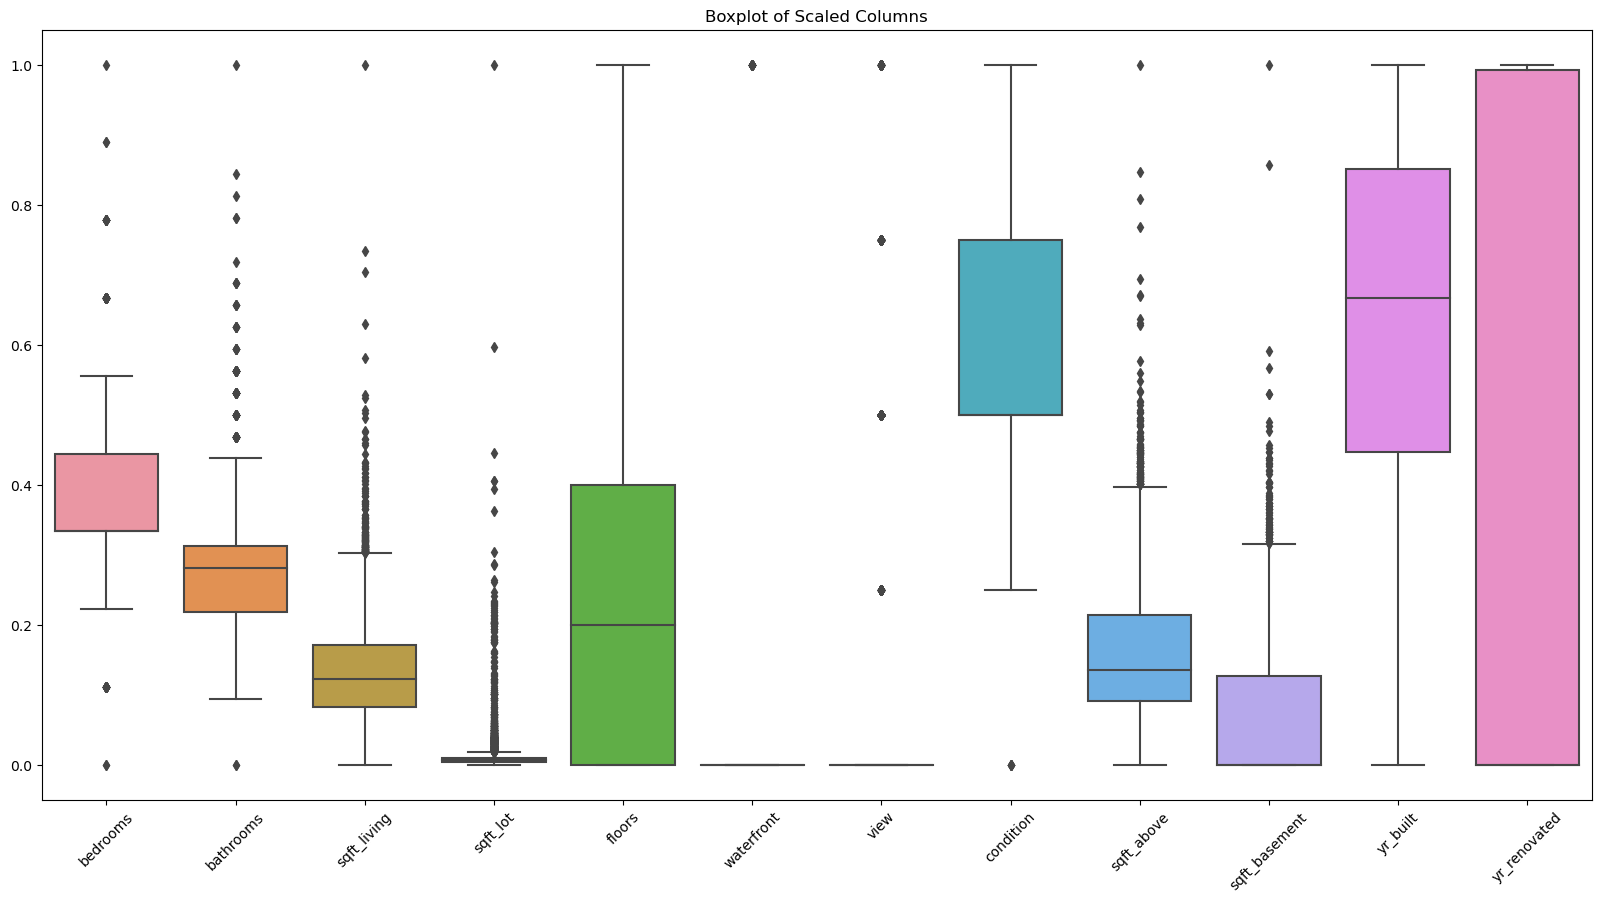

In [10]:
# Visualize the distribution, spread, and potential outliers in the dataset for each variable using a boxplot

# Define the column for the boxplot
column = 'price'

# Create the boxplot
plt.figure(figsize=(5, 10))
sns.boxplot(data=df[[column]], orient='v')
plt.xticks(rotation=45)
plt.ylim(0, 3e6)
plt.title(f"Boxplot of {column}")
plt.show()

# Define the columns for the boxplot
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

# Apply min-max scaling to the selected columns
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df[columns]), columns=columns)

# Create the boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(data=scaled_df)
plt.xticks(rotation=45)
plt.title("Boxplot of Scaled Columns")
plt.show()

### A correlation matrix heatmap is a graphical representation of the correlation matrix, which shows the correlation coefficients between pairs of variables in a dataset. The correlation matrix heatmap uses a color scale to represent the strength and direction of the correlations between variables. This visualization helps identify relationships and patterns between variables, making it easier to understand the structure of the dataset.The correlation coefficient is a value between -1 and 1, where:

### 1 indicates a strong positive correlation (as one variable increases, the other variable also increases),
### -1 indicates a strong negative correlation (as one variable increases, the other variable decreases), and
### 0 indicates no correlation between the variables.

### A correlation matrix heatmap can be particularly useful for:

### Identifying which pairs of variables are strongly correlated, which can inform feature selection or dimensionality reduction.
### Detecting potential multicollinearity issues, where two or more independent variables are highly correlated, which can lead to problems in some regression models.
### Gaining insights into the relationships between variables, which can help inform further analysis and modeling decisions.

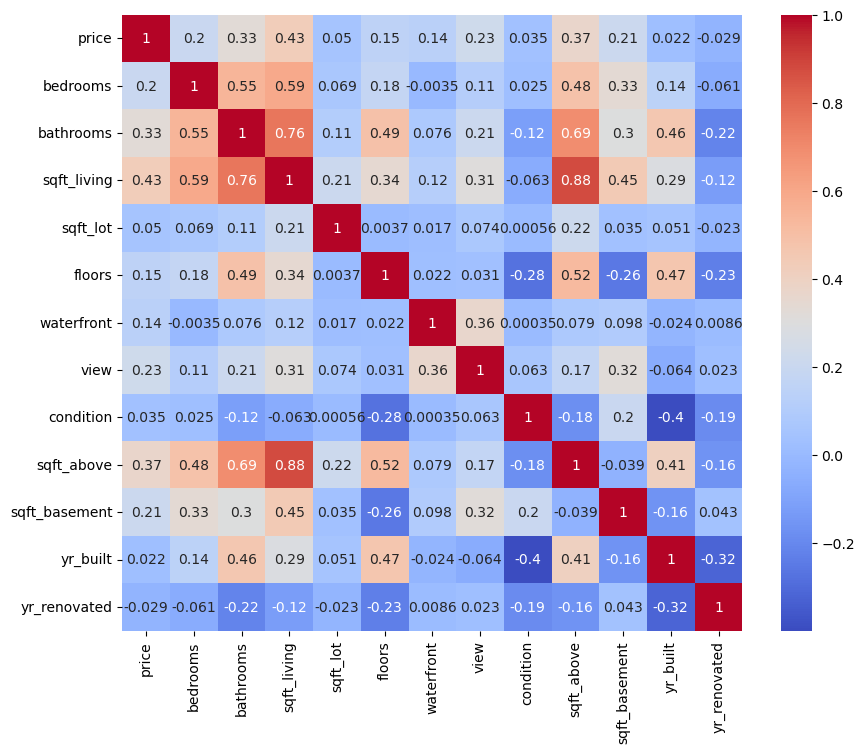

In [11]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

### linear regression in scikit-learn is used to build a linear model that can predict the house prices based on the input features, such as 'sqft_living', 'sqft_lot', 'bedrooms', and 'bathrooms'. Linear regression assumes that there is a linear relationship between the input features and the target variable, in this case, the house price. The goal of linear regression is to find the optimal weights (coefficients) for the input features and a bias term (intercept) such that the sum of squared differences between the predicted and actual house prices is minimized. The resulting linear model can be used to predict house prices for new, unseen data.

sqft_living: Coefficient = 251.95013105919193 Intercept = 12954.242396307876
sqft_lot: Coefficient = 0.7927166756315325 Intercept = 540189.1512958274
yr_built: Coefficient = 414.4928799251022 Intercept = -264913.90253303596
sqft_above: Coefficient = 240.38036918684367 Intercept = 112724.24865764152


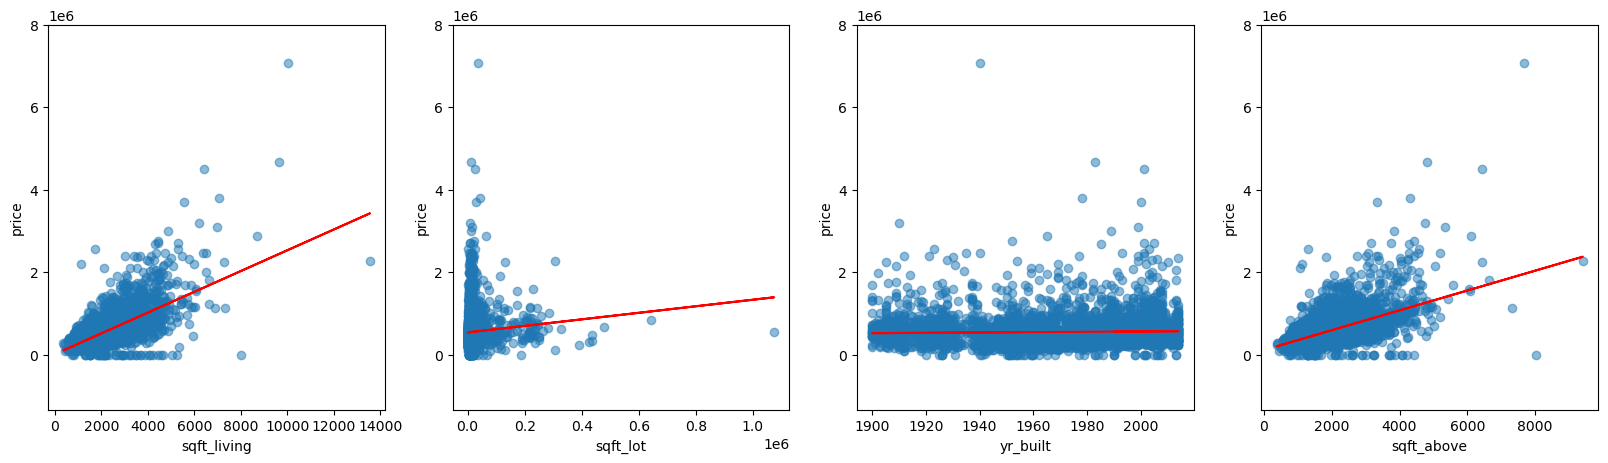

In [12]:
from sklearn.linear_model import LinearRegression

# extract features and target
X1 = df["sqft_living"].values.reshape(-1, 1)
X2 = df["sqft_lot"].values.reshape(-1, 1)
X3 = df["yr_built"].values.reshape(-1, 1)
X4 = df["sqft_above"].values.reshape(-1, 1)
y = df["price"].values.reshape(-1, 1)

# create linear regression models
model1 = LinearRegression().fit(X1, y)
model2 = LinearRegression().fit(X2, y)
model3 = LinearRegression().fit(X3, y)
model4 = LinearRegression().fit(X4, y)

# print coefficients and intercepts for each model
print("sqft_living: Coefficient =", model1.coef_[0][0], "Intercept =", model1.intercept_[0])
print("sqft_lot: Coefficient =", model2.coef_[0][0], "Intercept =", model2.intercept_[0])
print("yr_built: Coefficient =", model3.coef_[0][0], "Intercept =", model3.intercept_[0])
print("sqft_above: Coefficient =", model4.coef_[0][0], "Intercept =", model4.intercept_[0])

# create subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# plot scatter plot and regression line for sqft_living vs price
axs[0].scatter(X1, y, alpha=0.5)
axs[0].plot(X1, model1.predict(X1), color='red')
axs[0].set_xlabel('sqft_living')
axs[0].set_ylabel('price')
axs[0].set_ylim(top=0.8e7)

# plot scatter plot and regression line for sqft_lot vs price
axs[1].scatter(X2, y, alpha=0.5)
axs[1].plot(X2, model2.predict(X2), color='red')
axs[1].set_xlabel('sqft_lot')
axs[1].set_ylabel('price')
axs[1].set_ylim(top=0.8e7)

# plot scatter plot and regression line for yr_built vs price
axs[2].scatter(X3, y, alpha=0.5)
axs[2].plot(X3, model3.predict(X3), color='red')
axs[2].set_xlabel('yr_built')
axs[2].set_ylabel('price')
axs[2].set_ylim(top=0.8e7)

# plot scatter plot and regression line for sqft_above vs price
axs[3].scatter(X4, y, alpha=0.5)
axs[3].plot(X4, model4.predict(X4), color='red')
axs[3].set_xlabel('sqft_above')
axs[3].set_ylabel('price')
axs[3].set_ylim(top=0.8e7)

# show plot
plt.show()

In [ ]:
# From the regression models, it can be seen that sqft_living is a strong predictor of price, followed by above ground sq ft and lot sq ft. Year built does not seem to be a good predictor of price. 

### A Random Forest Regressor is a machine learning model that can be used for regression tasks, like predicting a continuous target variable based on input features. In the context of your housing dataset, a Random Forest Regressor can be used to predict house prices based on the features you've provided, such as 'sqft_living', 'sqft_lot', 'bedrooms', and 'bathrooms'.

### The Random Forest Regressor is an ensemble learning method that combines multiple decision tree models. Each decision tree is trained on a random subset of the training data,and during the process, a random subset of the features is considered for splitting at each node. This randomness helps to make the model more robust and less prone to overfitting the training data.

### To use a Random Forest Regressor for this dataset, the model is first trained using the training data (features and target variable), and then evaluate the model's performance by comparing its predictions to the actual house prices in the test dataset. It is also possible to tune the hyperparameters of the Random Forest Regressor, such as the number of trees in the ensemble and the maximum depth of the trees, to improve its performance.

RMSE: 309804.4980616221


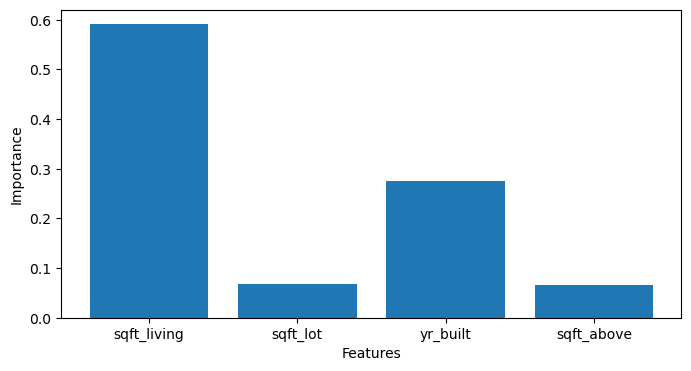

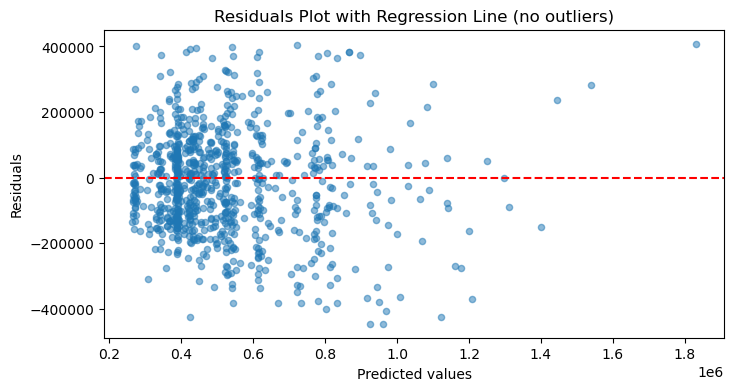

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# extract the features and target variable
X = df[["sqft_living", "sqft_lot", "yr_built", "sqft_above"]]
y = df["price"]

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# create a random forest model
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)

# train the model on the training data
rf.fit(X_train, y_train)

# Predict the prices for the test data
y_pred = rf.predict(X_test)

# calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

# Plot the feature importances
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(X.columns, rf.feature_importances_)
ax.set_xlabel("Features")
ax.set_ylabel("Importance")
plt.show()

# Calculate the residuals
residuals = y_test - y_pred

# Calculate the IQR and identify outliers
Q1 = np.percentile(residuals, 25)
Q3 = np.percentile(residuals, 75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
outliers = (residuals > upper_limit) | (residuals < lower_limit)

# Calculate the slope and intercept of the regression line without outliers
slope, intercept = np.polyfit(y_pred[~outliers], residuals[~outliers], 1)

# Create a residuals plot with a regression line without outliers
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(y_pred[~outliers], residuals[~outliers], alpha=0.5, s = 20)
ax.set_xlabel("Predicted values")
ax.set_ylabel("Residuals")
plt.axhline(y=0, color="red", linestyle="--")
ax.set_title("Residuals Plot with Regression Line (no outliers)")
plt.show()

RMSE: 286716.18588891084


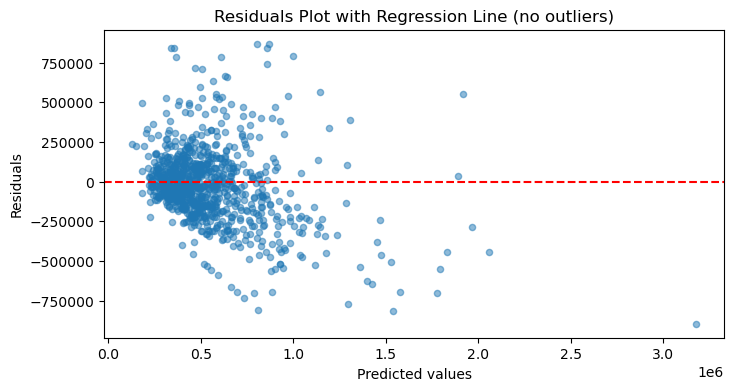

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Exclude outliers
df = df[df['price'] < 5000000]

# Extract features and target
X = df[["sqft_living", "sqft_lot", "sqft_above"]]
y = df["price"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a gradient boosting regressor model
model = GradientBoostingRegressor(n_estimators=100, max_depth=10, random_state=25)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

# Create a residual plot with outliers removed
residuals = y_test - y_pred
outliers = np.abs(residuals) > 1e6
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(y_pred[~outliers], residuals[~outliers], alpha=0.5, s=20)
ax.set_xlabel("Predicted values")
ax.set_ylabel("Residuals")
plt.axhline(y=0, color="red", linestyle="--")
ax.set_title("Residuals Plot with Regression Line (no outliers)")
plt.show()

In [57]:
from sklearn.ensemble import RandomForestRegressor

# extract features and target
X1 = df[["sqft_living"]]
X2 = df[["sqft_lot"]]
X3 = df[["sqft_above"]]
y = df["price"]

# create random forest model
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X1, y)

# calculate residuals
y_pred = model.predict(X1)
residuals = y - y_pred

# print mean and normality test
mean_resid = residuals.mean()
stat, p = stats.kstest(residuals, 'norm')
print("Mean of residuals:", mean_resid)
print("Kolmogorov-Smirnov test statistic:", stat)
print("p-value:", p)
if p > 0.05:
    print("Residuals are normally distributed")
else:
    print("Residuals are not normally distributed")
    
# Calculate R^2 scores
    from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f'R² Score: {r2}')

Mean of residuals: -469.2444202716286
Kolmogorov-Smirnov test statistic: 0.5438329345225147
p-value: 0.0
Residuals are not normally distributed
R² Score: 0.03167081318844833


### In order to further model the data and predict prices, the following code creates, compiles, and trains a simple feedforward neural network using TensorFlow and Keras. The neural network consists of three layers:
### Input layer with 4 neurons (corresponding to the 4 input features) and a ReLU activation function.
### Hidden layer with 64 neurons and a ReLU activation function.
### Output layer with 1 neuron (corresponding to the target variable, price).
### The model is compiled using the Adam optimizer and Mean Squared Error (MSE) as the loss function. The model is then trained on the training data (X_train, y_train) for 100 epochs with a batch size of 20 and a validation split of 0.2, which means that 20% of the training data is used for validation during training.After training, the model is evaluated on the test set (X_test, y_test), and the test MSE and RMSE are calculated and printed.

In [17]:
# Load the dataset for tensorflow feedforward neural network
data = pd.read_csv('housingdata.csv')

# Select the features and target variable
features = data[['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms']]
target = data['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Set up TensorBoard log directory
log_dir = os.path.join("logs", datetime.now().strftime("%Y%m%d-%H%M%S"))

# Create the TensorBoard callback
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, profile_batch='500,520')

# Train the model and store the history
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=20,
    validation_split=0.2,
    callbacks=[tensorboard_callback]
)

# Evaluate the model on the test set
mse_test = model.evaluate(X_test, y_test)
print(f'Test MSE: {mse_test}')

# Make predictions
predictions = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse}')

Epoch 1/100
148/148 [==============================] - 3s 8ms/step - loss: 448287080448.0000 - val_loss: 401453285376.0000
Epoch 2/100
148/148 [==============================] - 1s 6ms/step - loss: 447993184256.0000 - val_loss: 400891379712.0000
Epoch 3/100
148/148 [==============================] - 1s 6ms/step - loss: 446873010176.0000 - val_loss: 399337586688.0000
Epoch 4/100
148/148 [==============================] - 1s 8ms/step - loss: 444340404224.0000 - val_loss: 396218662912.0000
Epoch 5/100
148/148 [==============================] - 1s 5ms/step - loss: 439849648128.0000 - val_loss: 391211941888.0000
Epoch 6/100
148/148 [==============================] - 1s 6ms/step - loss: 433045241856.0000 - val_loss: 383967363072.0000
Epoch 7/100
148/148 [==============================] - 1s 6ms/step - loss: 423621984256.0000 - val_loss: 374326755328.0000
Epoch 8/100
148/148 [==============================] - 1s 5ms/step - loss: 411673493504.0000 - val_loss: 362491478016.0000
Epoch 9/100
148/

In [18]:
# Train the model and store the history
history = model.fit(X_train, y_train, epochs=100, batch_size=20, validation_split=0.2)

Epoch 1/100
148/148 [==============================] - 7s 44ms/step - loss: 79007186944.0000 - val_loss: 63961182208.0000
Epoch 2/100
148/148 [==============================] - 2s 15ms/step - loss: 78944378880.0000 - val_loss: 63878770688.0000
Epoch 3/100
148/148 [==============================] - 2s 13ms/step - loss: 78876172288.0000 - val_loss: 63808077824.0000
Epoch 4/100
148/148 [==============================] - 2s 13ms/step - loss: 78788313088.0000 - val_loss: 63708246016.0000
Epoch 5/100
148/148 [==============================] - 1s 6ms/step - loss: 78733836288.0000 - val_loss: 63660720128.0000
Epoch 6/100
148/148 [==============================] - 1s 7ms/step - loss: 78663589888.0000 - val_loss: 63573618688.0000
Epoch 7/100
148/148 [==============================] - 1s 5ms/step - loss: 78594195456.0000 - val_loss: 63499915264.0000
Epoch 8/100
148/148 [==============================] - 1s 5ms/step - loss: 78522458112.0000 - val_loss: 63452053504.0000
Epoch 9/100
148/148 [=======

In [ ]:
def plot_rmse(train_rmse, val_rmse):
    epochs = range(1, len(train_rmse) + 1)
    
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, train_rmse, label='Training RMSE')
    plt.plot(epochs, val_rmse, label='Validation RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.title('RMSE vs Epochs')
    plt.show()
    

In [ ]:
plot_rmse(train_rmse, val_rmse)

In [46]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_rmse = np.sqrt(train_loss)
val_rmse = np.sqrt(val_loss)
print (val_rmse)

# Evaluate the model on the test set
results = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss (MSE): {results}')

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

results = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss (MSE): {results[0]}, Test MAE: {results[1]}')

# Make predictions
predictions = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse}')

[520504.7248969  306893.54047291 279816.1535866  264892.18842389
 257296.94670555 253416.34637095 250847.18969125 249538.21594297
 248546.77480104 247626.13160973 247090.1586385  246683.74727168
 246597.09104529 246100.93851101 246116.45815752 245592.00925112
 245538.40843339 246468.85271774 245258.16262869 245497.86853657
 245499.50360846 245725.47257458 245391.57384067 244900.02871376
 245338.29652951 244910.38138878 244656.10411351 245306.71530963
 245493.37203273 244398.88916278 244422.1418448  244392.54561463
 244335.93242092 244568.18514271 247425.38230343 244364.45437093
 244848.26713702 245165.64796888 244845.02174233 244096.55374872
 244091.56157475 243977.32615962 244047.69317492 244311.28838431
 243948.43992942 244021.64363023 244079.20235858 244284.84776588
 244170.68600469 244355.31061141 245606.67717308 244023.19627445
 244024.84122728 244140.11976732 244245.94450676 244673.84147881
 244170.05693573 244655.79438877 243949.15352179 244090.26946603
 244641.98194096 244627.8

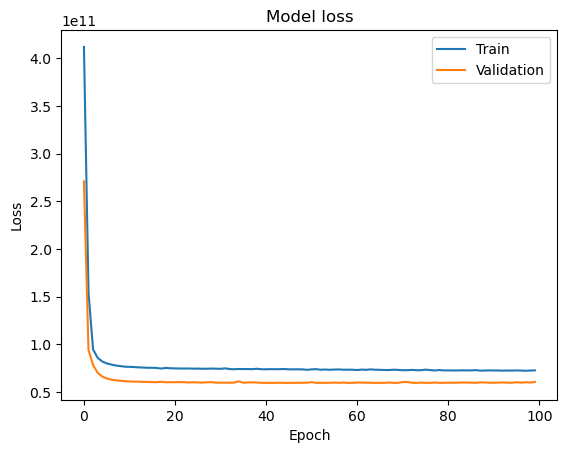

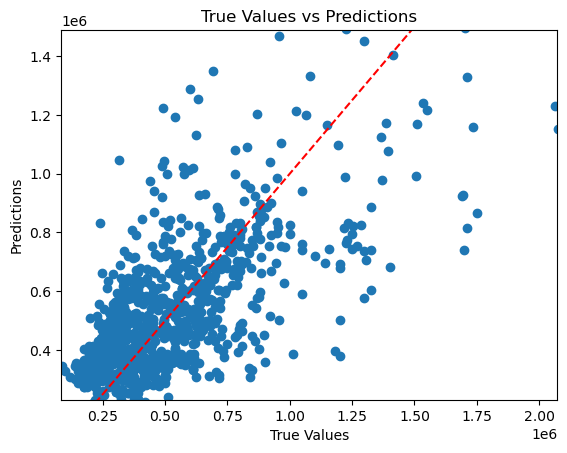

In [47]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Calculate percentiles
lower_x = np.percentile(y_test, 1)
upper_x = np.percentile(y_test, 99)
lower_y = np.percentile(predictions, 1)
upper_y = np.percentile(predictions, 99)

# Scatter plot of true values vs. predictions
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')

# Set the limits for the x and y axis
plt.xlim(lower_x, upper_x)
plt.ylim(lower_y, upper_y)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

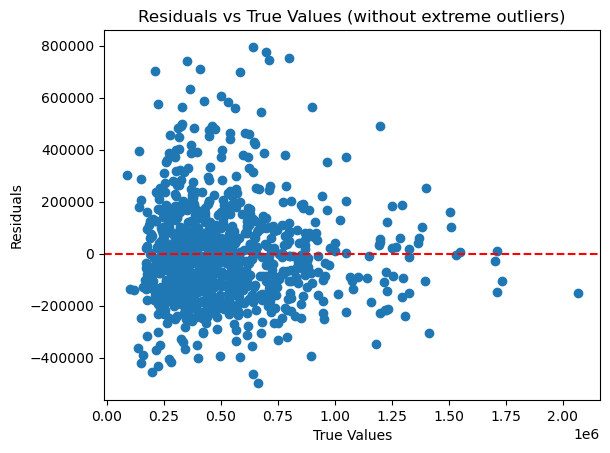

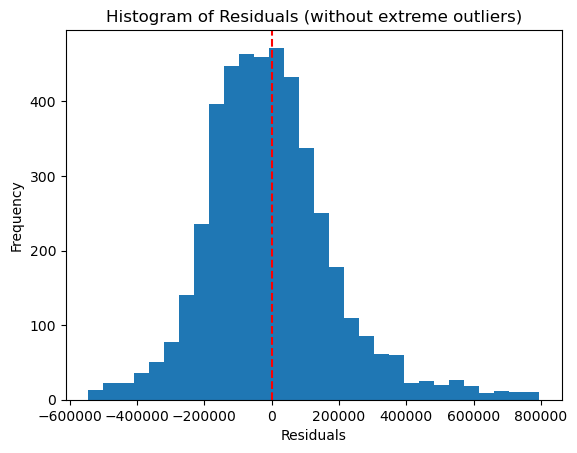

In [48]:
# Calculate percentiles for true values and residuals
lower_x = np.percentile(y_test, 1)
upper_x = np.percentile(y_test, 99)
lower_y = np.percentile(residuals, 1)
upper_y = np.percentile(residuals, 99)

# Filter the data
filtered_y_test = y_test[(y_test >= lower_x) & (y_test <= upper_x) & (residuals >= lower_y) & (residuals <= upper_y)]
filtered_residuals = residuals[(y_test >= lower_x) & (y_test <= upper_x) & (residuals >= lower_y) & (residuals <= upper_y)]

# Scatter plot of true values vs. residuals
plt.scatter(filtered_y_test, filtered_residuals)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residuals vs True Values (without extreme outliers)')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Calculate percentiles for residuals
lower_res = np.percentile(residuals, 1)
upper_res = np.percentile(residuals, 99)

# Filter the residuals
filtered_residuals = residuals[(residuals >= lower_res) & (residuals <= upper_res)]

# Histogram of filtered residuals
plt.hist(filtered_residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (without extreme outliers)')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

In [50]:
def create_model(n_units1, n_units2, learning_rate):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(int(n_units1), activation='relu', input_shape=(4,)),
        tf.keras.layers.Dense(int(n_units2), activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    
    return model

rmse_values = []

def evaluate_model(n_units1, n_units2, learning_rate):
    model = create_model(n_units1, n_units2, learning_rate)
    
    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=20,
        validation_split=0.2,
        verbose=0,
        callbacks=[tensorboard_callback]
    )
    
    mse_test = model.evaluate(X_test, y_test, verbose=0)
    rmse = np.sqrt(mse_test)
    rmse_values.append(rmse)
    return -rmse

### Bayesian optimization is a global optimization technique specifically designed for optimizing noisy objective functions, often used in hyperparameter tuning for machine learning models. It is particularly useful when the number of evaluations of the objective function is limited due to time or cost constraints.The main idea behind Bayesian optimization is to build a probabilistic model of the objective function and use it to guide the search for the optimal solution. The probabilistic model (often a Gaussian Process) estimates the underlying function and its uncertainty (confidence) at different points in the search space. An acquisition function is then used to balance the exploration (searching in areas with high uncertainty) and exploitation (searching in areas with high expected improvement) in the search process.

In [51]:
# Bayesian optimization
pbounds = {'n_units1': (32, 128), 'n_units2': (32, 128), 'learning_rate': (1e-4, 1e-2)}
optimizer = BayesianOptimization(f=evaluate_model, pbounds=pbounds, verbose=2, random_state=42)
optimizer.maximize(init_points=5, n_iter=10)

# Retrieve the best parameters
best_params = optimizer.max['params']
best_n_units1 = int(best_params['n_units1'])
best_n_units2 = int(best_params['n_units2'])
best_learning_rate = best_params['learning_rate']

# Train the best model
best_model = create_model(best_n_units1, best_n_units2, best_learning_rate)
history = best_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=20,
    validation_split=0.2,
    callbacks=[tensorboard_callback]
)

# Evaluate the best model on the test set
mse_test = best_model.evaluate(X_test, y_test)
print(f'Test MSE: {mse_test}')

# Make predictions
predictions = best_model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'RMSE: {rmse}')

|   iter    |  target   | learni... | n_units1  | n_units2  |
-------------------------------------------------------------
| 1         | -9.977e+0 | 0.003808  | 123.3     | 102.3     |
| 2         | -9.995e+0 | 0.006027  | 46.98     | 46.98     |
| 3         | -1.14e+06 | 0.000675  | 115.2     | 89.71     |
| 4         | -9.96e+05 | 0.00711   | 33.98     | 125.1     |
| 5         | -9.963e+0 | 0.008341  | 52.38     | 49.46     |
| 6         | -9.956e+0 | 0.006853  | 128.0     | 112.8     |
| 7         | -1.004e+0 | 0.002276  | 113.5     | 116.7     |
| 8         | -9.958e+0 | 0.009844  | 45.28     | 64.03     |
| 9         | -1.112e+0 | 0.001177  | 61.93     | 65.18     |
| 10        | -9.961e+0 | 0.01      | 36.2      | 56.68     |
| 11        | -9.971e+0 | 0.00711   | 33.31     | 71.79     |
| 12        | -9.958e+0 | 0.00649   | 33.06     | 109.4     |
| 13        | -9.991e+0 | 0.004692  | 47.5      | 116.4     |
| 14        | -9.953e+0 | 0.009579  | 36.47     | 91.45     |
| 15    

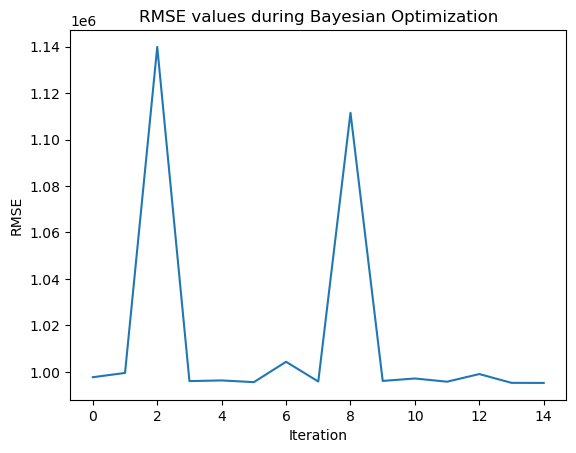

In [52]:
plt.plot(rmse_values)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('RMSE values during Bayesian Optimization')
plt.show()

### It's important to determine whether or not the Bayesian optimization was successul or not. The following code compares the initial RMSE of the neural network to the RMSE of the optimized neural network. 

In [53]:
initial_model = create_model(64, 64, 0.001) 
initial_history = initial_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=20,
    validation_split=0.2,
    verbose=0,
    callbacks=[tensorboard_callback]
)
initial_mse_test = initial_model.evaluate(X_test, y_test, verbose=0)
initial_rmse = np.sqrt(initial_mse_test)

best_params = optimizer.max['params']
best_model = create_model(best_params['n_units1'], best_params['n_units2'], best_params['learning_rate'])
best_history = best_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=20,
    validation_split=0.2,
    verbose=0,
    callbacks=[tensorboard_callback]
)
best_mse_test = best_model.evaluate(X_test, y_test, verbose=0)
best_rmse = np.sqrt(best_mse_test)

print(f'Initial model RMSE: {initial_rmse}')
print(f'Best model RMSE (after Bayesian optimization): {best_rmse}')

Initial model RMSE: 1132976.177938442
Best model RMSE (after Bayesian optimization): 995017.7294179235


### The Bayesian optimization was successful as it produces a slightly lower RMSE value than the initial model. 

### TensorBoard is a powerful visualization tool that is useful for monitoring and debugging machine learning models during training. It can display a variety of information including:

### Loss and metric plots: TensorBoard can show the trend of the loss and other evaluation metrics during training over time. This is useful for identifying overfitting, convergence, and other performance issues.

### Model graph visualization: TensorBoard can display a graph of the model architecture, which can help identify problems in the model design and structure.

### Activation histograms: TensorBoard can display histograms of activation values for each layer of the model. This can help diagnose vanishing or exploding gradients and identify which layers are contributing most to the model output.

### Embeddings: TensorBoard can display high-dimensional embeddings of the input data, allowing for exploration and visualization of relationships between the features.

### Debugging: TensorBoard allows for interactive debugging of the model, such as visualizing the gradient flow and detecting dead neurons. 

### The Graphs tab is of particular interest because it provides a visualization of the TensorFlow graph used to create the model. The TensorFlow graph is a dataflow graph that shows the flow of data through the model's operations, including inputs, outputs, and intermediate tensors.

In [56]:
%load_ext tensorboard
%tensorboard --logdir 'C:\\Users\\matthew.saporito\\SynologyDrive\\ASU\\DAT 301\\Projects' 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
